# DIFFUSION MODELING

##### using the diffusion equation to measure how many cosmic rays will make its way to earth from SN at different distances

n(E, r ,t )=  Q(E) / ((np.pi**(3/2)) * (rdiff**3) * exp((-r**2)/(rdiff**2)) 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad

In [2]:
Qi = 5e49 * 624.151 #ergs to GeV (let assume 10^51 erg is in CRs to keep it simple)
#dN/dE = Qi * ((E**-2.2)* np.exp((-E)/1e5)) this is the spectrum (units: GeV^(-1))
#We assume that the accelerator injects cosmic-ray protons continuously
def diffusion(E,r,t, **kwargs): #defining the diffusion equation
   # Q  = Qi * ((E**-2.2)* np.exp((-E)/1e6)) #initial formula
    Q  = Qi * ((E**-2.2)* np.exp((-E*E)/1e10)) #I think 10^5 GeV  is a better cut-off (100 TeV) and exp^2 too (looks better)
    D  = (2e29) * (E/(10))**(1/3) #2e28 in Melott 2017 in cm^2 s^(-1)
    rd = (4 * D * t) **.5 #diffusion distance, time here is in seconds!!
    #n  = (Q/ (((np.pi**(3/2)) * (rd**3)))) * (np.exp(-(r**2) / rd**2)) # number density units: GeV^(-1) cm^(-3)
    n  = (Q/ (((np.pi**(3/2)) * (rd**3)))) * (np.exp(-(r**2) / rd**2))*3e10/(4.*np.pi)*1e4 #FLUX GeV^(-1) m^(-2) s^(-1) sr^(-1)
    return n
print(Qi)

#formula (30.2) of https://pdg.lbl.gov/2017/reviews/rpp2017-rev-cosmic-rays.pdf converted in GeV^(-1) m^(-2) s^(-1) sr^(-1)
def GCR(E):
    f = 1.8e4 * (E**-2.7)
    return f


3.120755e+52


/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


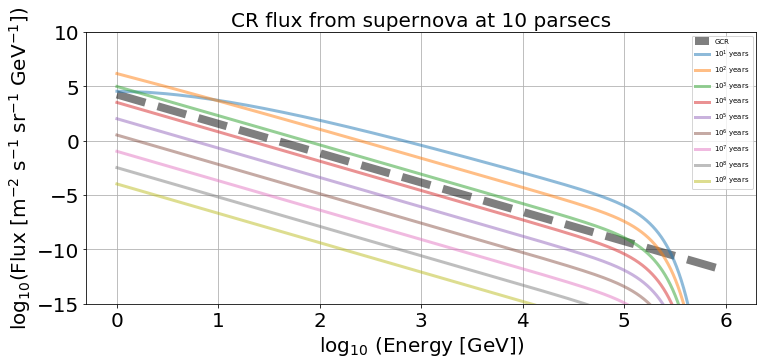

/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


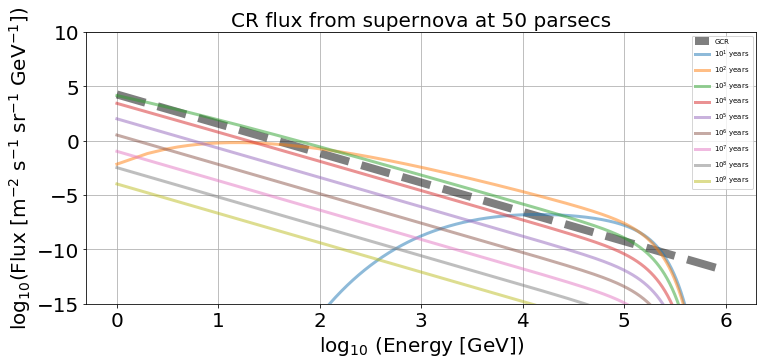

In [3]:
#trying a for loop so that i dont have to type everything out everytime for each graph...
#constant time and distance
#@ DISTANCE OF 50 PC


a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed
x_coords = np.linspace(a,b,b) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(12, 5)) # figure size
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')
for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,10*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 10 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend(prop={'size': 7})
plt.grid()
plt.show()


a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed
x_coords = np.linspace(1,10**6,10**6) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(12, 5)) # figure size
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')
for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,50*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 50 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend(prop={'size': 7})
plt.grid()
plt.show()


/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


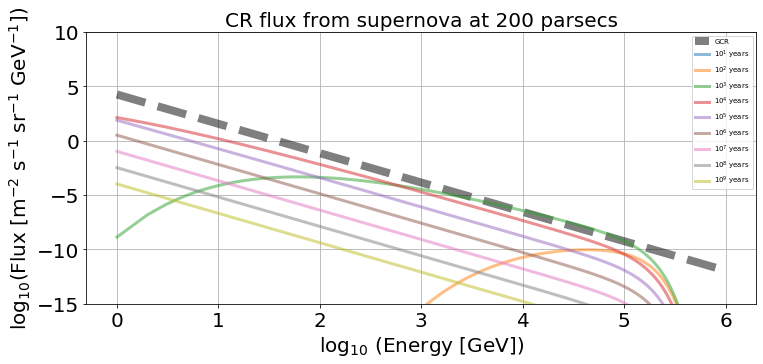

In [4]:
a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed
x_coords = np.linspace(1,10**6,10**6) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(12, 5)) # figure size
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')
for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,200*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 200 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend(prop={'size': 7})
plt.grid()
plt.show()

In [5]:
#INTEGRAL 
for i in range(1,11): #i in range time
    def integrand(E): #here x = E where we are integrating wrt x 
                            #a = lower bound b= upper bound
        return(diffusion(E,50*3.06e18, 3.154e7*10**i))
    N = (quad(integrand, a, b))* np.array([1,1])
    print(f'number of particles from {a}GeV to {b} GeV, 50 pc, and t = 10^{i} =  {N[0]-N[1]}')
   # def intensity(N): 
       # return (0.3066/4*np.pi)*(N)
    #plt.plot(x_coords, intensity(N) , alpha = .5, linewidth=3.0, label = f'10^{i} years') #plotting the graphs
    #name = 'plot' + str(i) #naming the string 
 

number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^1 =  0.008256851685623873
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^2 =  64.9727283941887
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^3 =  12191.11121686276
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^4 =  1662.1254171594705
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^5 =  61.06803613192806
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^6 =  -4.443107636615398e-08
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^7 =  -1.3171280669246198e-08
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^8 =  -4.163689557890372e-10
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^9 =  -1.9060588764243033e-09
number of particles from 1GeV to 1000000 GeV, 50 pc, and t = 10^10 =  -6.027488450618698e-11


/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


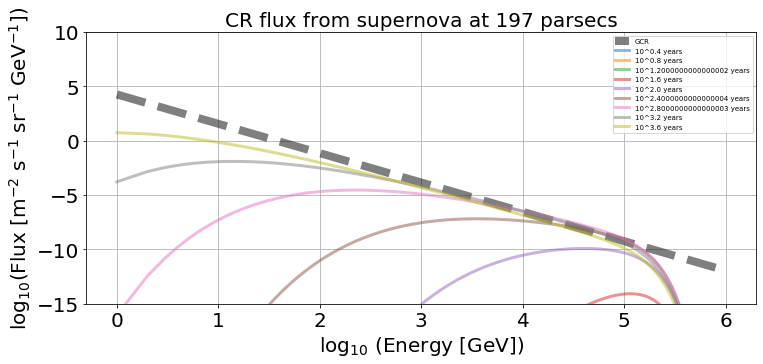

number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^2 =  9.853554774789616e-06
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^3 =  0.21783269768537802
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^4 =  161.4729862621162
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^5 =  -1.8339866108125033e-06
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^6 =  -4.8187077464704696e-08
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^7 =  -1.3244577463338146e-08
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^8 =  -4.166005503428286e-10
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^9 =  -1.906053534859749e-09
number of particles from 1GeV to 1000000 GeV, 197 pc, and t = 10^10 =  -6.027486761465241e-11


/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/Users/nglobus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: IntegrationWarning: The integral is probably divergent, or slowly convergent.


In [6]:
a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed

x_coords = np.linspace(a,b,b) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(12, 5)) # figure size
#plotting GCR
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')

#plotting wrt time 
for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,197*3.06e18, 3.154e7*10**(i*.4)) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords)), alpha = .5, linewidth=3.0, label = f'10^{i * .4} years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 197 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV$^{-1}$])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xlim()
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend(prop={'size': 7})
plt.grid()
plt.show()



#INTEGRAL 
for i in range(2,11): #i in range time
    def integrand(E): #here x = E where we are integrating wrt x 
                            #a = lower bound b= upper bound
        return(diffusion(E, 197*3.06e18, 3.154e7*10**i))
    N = (quad(integrand, a, b))* np.array([1,1])
    print(f'number of particles from {a}GeV to {b} GeV, 197 pc, and t = 10^{i} =  {N[0]-N[1]}')


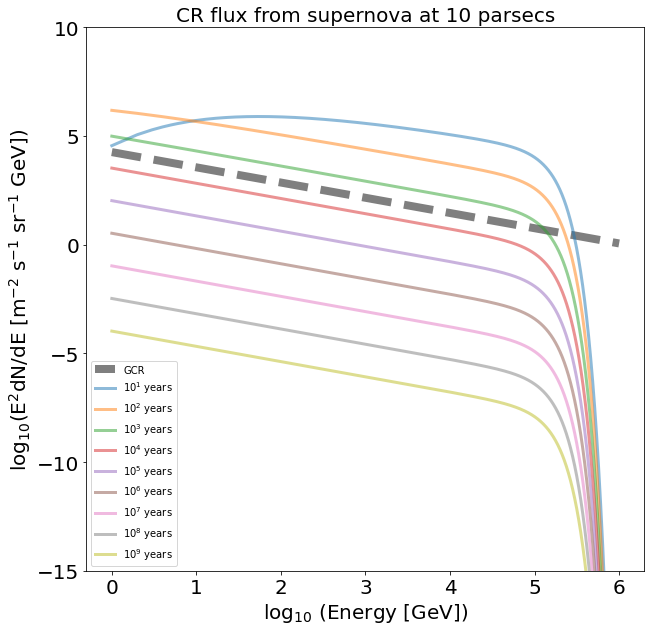

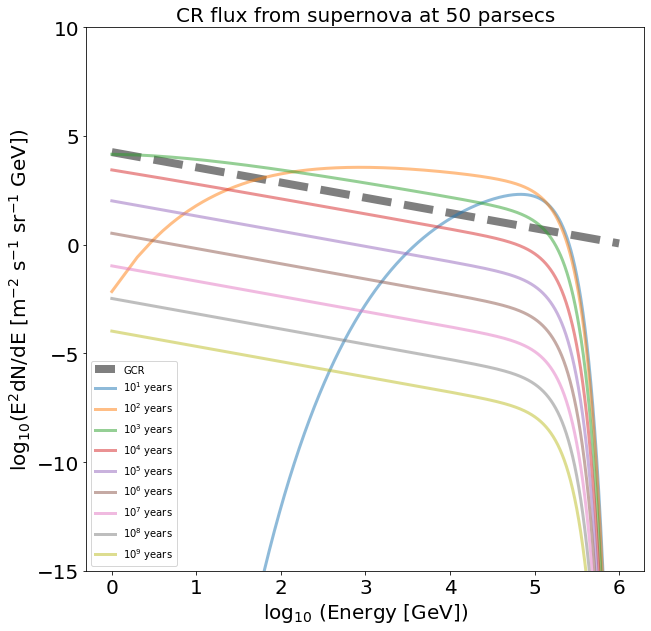

/var/folders/g6/vtyfqk5s09d98k357hcpy5vw0000gn/T/ipykernel_11480/2587077067.py:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


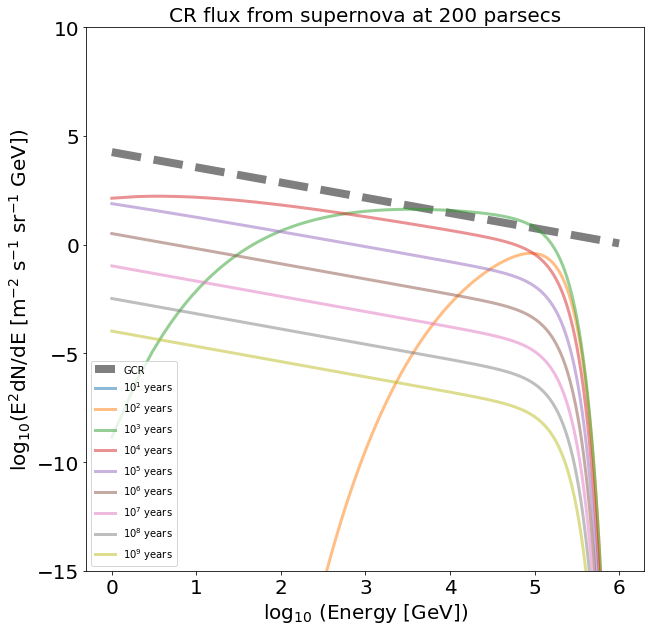

In [8]:
#trying a for loop so that i dont have to type everything out everytime for each graph...
#constant time and distance


#PLOTS E^2 dN/dE to compare directly with Melott et al 2017


a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed

x_coords = np.linspace(a,b,b) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between

plt.figure(figsize=(10, 10)) # figure size
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')

for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,10*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 10 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(E$^2$dN/dE [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend()
plt.show()


a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed

x_coords = np.linspace(a,b,b) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(10, 10)) # figure size

y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')

for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,50*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 

    plt.title("CR flux from supernova at 50 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(E$^2$dN/dE [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend()
plt.show()


a = 1 #lower bound of energy
b = 10**6 #higher bound of energy 1PeV assumed

x_coords = np.linspace(a,b,b) #x coords E are defined from 1 GeV to 20e5 with 20e5 intervals in between
plt.figure(figsize=(10, 10)) # figure size
y_coords = GCR(x_coords)    
plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=8.0, color = 'black', linestyle = '--', label = 'GCR')
for i in range(1,10): #i in range time
    y_coords = diffusion(x_coords,200*3.06e18, 3.154e7*10**i) #r should be in cm and time in seconds
    plt.plot((np.log10(x_coords)),(np.log10(y_coords*x_coords*x_coords)), alpha = .5, linewidth=3.0, label = f'10$^{i}$ years') #plotting the graphs
    name = 'plot' + str(i) #naming the string 
plt.title("CR flux from supernova at 200 parsecs", fontsize=20)
plt.xlabel("log$_{10}$ (Energy [GeV])", fontsize=20)
plt.ylabel("log$_{10}$(E$^2$dN/dE [m$^{-2}$ s$^{-1}$ sr$^{-1}$ GeV])", fontsize=20)
#plt.vlines(5, 0 ,60, color = 'black', label = 'energy cuttoff', linestyle = '--')
plt.ylim(-15,10)
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.legend()
plt.show()